In [89]:
import pandas as pd
df = pd.read_csv('turnstile_unit_zip.csv')

In [115]:
df[df.isna().any(axis=1)]

,stop_name,line,zipcode,turnstile_station_id,match_method
5,104102ndsts,jz,11418,NaN,NaN
76,23stelyavenue,em,11101,NaN,NaN
96,42ndstportauoritybusterm,ace,10036,NaN,NaN
97,45courthousesq,77,11101,NaN,NaN
106,50st,2,10107,NaN,NaN
...,...,...,...,...,...
450,w4stwashingtonsqlower,bdfm,10011,NaN,NaN
451,w4stwashingtonsqupper,ace,10014,NaN,NaN
458,whitehallst,nr,10004,NaN,NaN
465,woodside61stst,77,11377,NaN,NaN


In [293]:
df1 = pd.read_csv('2019_mta_counts.csv')

In [118]:
df2 = df[['zipcode', 'turnstile_station_id']]

In [130]:
df2.rename(columns={'turnstile_station_id': 'unit'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [131]:
df2.head()

,zipcode,unit
0,10025-4403,r314
1,10029,r180
2,10025,r191
3,11368,r208
4,11419,r354


In [296]:
df1.unit = df1.unit.str.lower()

In [304]:
dfm = pd.merge(df1, df2, on='unit')

In [312]:
dfm.sort_values('date').tail()

,Unnamed: 0,unit,scp,station,linename,date,entries,day_count,zipcode
164114,191219,r208,00-00-02,103 ST-CORONA,7,2019-05-17,2298470,1883.0,11368
68034,85057,r079,01-06-00,5 AV/59 ST,NQRW,2019-05-17,573730,527.0,10153
164038,191142,r208,00-00-01,103 ST-CORONA,7,2019-05-17,14341947,1756.0,11368
67730,84749,r079,00-03-01,5 AV/59 ST,NQRW,2019-05-17,176889,1699.0,10153
283049,318419,r464,00-06-03,AQUEDUCT RACETR,A,2019-05-17,51047585,378.0,11417


In [308]:
dfm.date = pd.to_datetime(dfm.date, format='%Y-%m-%d')

In [309]:
low = np.datetime64('2019-03-31')
high = np.datetime64('2019-05-17')
dfm = dfm[(dfm.date >= low) & (dfm.date <= high)]

In [306]:
df_master.date.max()

'2020-05-17'

In [ ]:
dfm = dfm[(dfm.date >= ]

In [152]:
counts2019 = dfm[dfm.zipcode == ]

'11208'

In [141]:
dfc = pd.read_csv('covid_curated.csv')

In [156]:
dfc.zipcode = dfc.zipcode.astype(str)

In [157]:
dfc.tail()

,zipcode,positive,prev_positive,daily_new,date
7962,10455,1187,1184.0,3.0,2020-05-17
7963,11233,1180,1173.0,7.0,2020-05-17
7964,11412,1180,1173.0,7.0,2020-05-17
7965,10017,132,130.0,2.0,2020-05-17
7966,11368,4213,4191.0,22.0,2020-05-17


In [145]:
dfc.drop(columns='Unnamed: 0', inplace=True)

In [180]:
df_master = pd.merge(dfm, dfc, on=['date', 'zipcode'])

In [181]:
df_master.head()

,Unnamed: 0,unit,scp,station,linename,date,entries,day_count,zipcode,positive,prev_positive,daily_new
0,2789,r003,00-00-00,CYPRESS HILLS,J,2020-03-31,625201,100.0,11208,350,NaN,NaN
1,2866,r003,00-00-01,CYPRESS HILLS,J,2020-03-31,1974157,56.0,11208,350,NaN,NaN
2,2943,r003,00-00-02,CYPRESS HILLS,J,2020-03-31,4874451,105.0,11208,350,NaN,NaN
3,187510,r200,00-00-00,EUCLID AV,AC,2020-03-31,1172470,291.0,11208,350,NaN,NaN
4,187587,r200,00-00-01,EUCLID AV,AC,2020-03-31,6243919,581.0,11208,350,NaN,NaN


In [182]:
df_master.drop(columns=['Unnamed: 0', 'prev_positive'], inplace=True)

In [194]:
df_master.tail()

,unit,scp,station,linename,date,entries,day_entries,zipcode,positive,day_cases
156380,r463,00-06-06,CANAL ST,JNQRZ6W,2020-05-17,102766562,12.0,10013,245,0.0
156381,r463,00-06-07,CANAL ST,JNQRZ6W,2020-05-17,4943536,8.0,10013,245,0.0
156382,r463,00-06-07,CANAL ST,JNQRZ6W,2020-05-17,4943536,8.0,10013,245,0.0
156383,r463,00-06-08,CANAL ST,JNQRZ6W,2020-05-17,1691542,13.0,10013,245,0.0
156384,r463,00-06-08,CANAL ST,JNQRZ6W,2020-05-17,1691542,13.0,10013,245,0.0


In [ ]:
df_master.rename(columns={'day_count': 'day_entries', 'daily_new': 'day_cases'}, inplace=True)

In [237]:
df_master = df_master[df_master.zipcode != '11232']

In [191]:
df_master.sample()

,unit,scp,station,linename,date,entries,day_entries,zipcode,positive,day_cases
71181,r224,00-00-01,CLARK ST,23,2020-04-30,7229357,18.0,11201,520,8.0


In [175]:
df_master.to_csv('mta_and_covid.csv')

In [192]:
len(df_master.station.sort_values().unique())

300

In [315]:
df_zip = (df_master
          .groupby(['zipcode', 'date'])[['day_entries', 'day_cases']]
          .agg({'day_entries': 'sum', 'day_cases': 'min'})
          .reset_index())

In [316]:
df_zip.sort_values('day_entries', ascending=False).head()

,zipcode,date,day_entries,day_cases
660,10019,2020-05-03,84851.0,4.0
2463,11101,2020-05-06,50748.0,6.0
240,10007,2020-04-18,47113.0,2.0
2922,11207,2020-05-15,18438.0,15.0
2921,11207,2020-05-14,17629.0,18.0


In [317]:
df_zip.sort_values('day_cases', ascending=False).head()

,zipcode,date,day_entries,day_cases
4191,11373,2020-04-09,2155.0,412.0
4101,11368,2020-04-09,5091.0,404.0
4096,11368,2020-04-03,6290.0,298.0
4146,11372,2020-04-09,2569.0,275.0
3331,11219,2020-04-03,1623.0,266.0


In [275]:
df_zip.date = pd.to_datetime(df_zip.date, format='%Y-%m-%d')

In [216]:
import numpy as np

In [277]:
from collections import defaultdict
zip_ride_covid = defaultdict(list)
for row in df_zip.itertuples():
    zip_ride_covid[row[1]].append((np.datetime64(row[2]), row[3], row[4]))

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [388]:
counts2019 = dfm[dfm.zipcode == '11368'].sort_values('date').groupby('date')['day_count'].sum()[3:]
countm2019 = dfm[dfm.zipcode == '10007'].sort_values('date').groupby('date')['day_count'].sum()[3:]

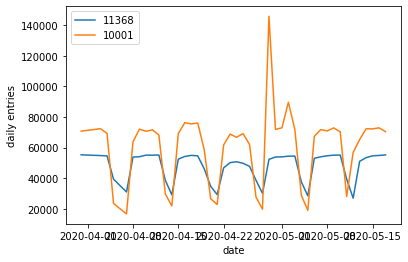

In [389]:
plt.plot(dates, counts2019)
plt.plot(dates, countm2019)
plt.xlabel('date')
plt.ylabel('daily entries')
plt.legend(['11368', '10001'],loc='upper left')

In [425]:
import seaborn as sns

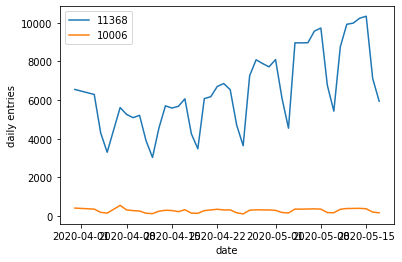

In [429]:
dates, entries_j, cases_j = list(zip(*zip_ride_covid['11368']))
dates, entries_m, cases_m = list(zip(*zip_ride_covid['10006']))
plt.plot(dates, entries_j, label='11368')
plt.plot(dates, entries_m, label='10006')
plt.xlabel('date')
plt.ylabel('daily entries')
plt.legend(loc='upper left')

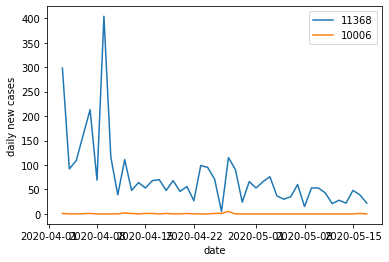

In [430]:
plt.plot(dates, cases_j, label='11368')
plt.plot(dates, cases_m, label='10006')
plt.xlabel('date')
plt.ylabel('daily new cases')
plt.legend(loc='upper right')

In [245]:
zip_ride_covid['11232']

[]

In [409]:
top_entries = (df_master.groupby('zipcode')[['day_entries','day_cases']]
 .agg({'day_entries': 'sum', 'day_cases': 'mean'})
 .sort_values('day_entries', ascending=False).reset_index())
top_entries.head(10)

,zipcode,day_entries,day_cases
0,11207,605938.0,36.590909
1,10452,504836.0,41.386364
2,10468,437553.0,48.734626
3,10037,414822.0,9.125191
4,10040,414569.0,19.171841
5,11101,393685.0,9.978340
6,10019,358696.0,8.813487
7,11201,299718.0,9.886364
8,11368,294890.0,74.227273
9,10472,289617.0,34.636364


In [438]:
top_cases = (df_master.groupby(['zipcode'])[['day_entries','day_cases']]
 .agg({'day_entries': 'sum', 'day_cases': 'mean'})
 .sort_values('day_cases', ascending=False)
             .reset_index())
top_cases.head(10)

,zipcode,day_entries,day_cases
0,11368,294890.0,74.227273
1,10467,224035.0,56.931818
2,10469,132524.0,53.431818
3,11373,107124.0,50.500000
4,10468,437553.0,48.734626
5,11219,61211.0,46.659091
6,11236,72949.0,43.557351
7,11372,151470.0,42.568182
8,10466,85384.0,42.454545
9,11208,230696.0,41.931818


In [431]:
top_entries_df = df_zip[df_zip.zipcode.isin(top_entries.zipcode.head(10))]

In [434]:
top_cases_df = df_zip[df_zip.zipcode.isin(top_cases.zipcode.head(10))]

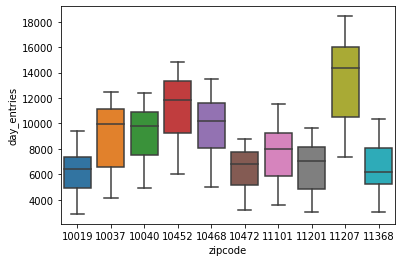

In [432]:
sns.boxplot('zipcode', 'day_entries', data=top_entries_df[top_entries_df.day_entries < 40000])

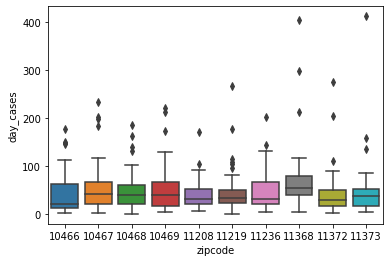

In [436]:
sns.boxplot('zipcode', 'day_cases', data=top_cases_df)

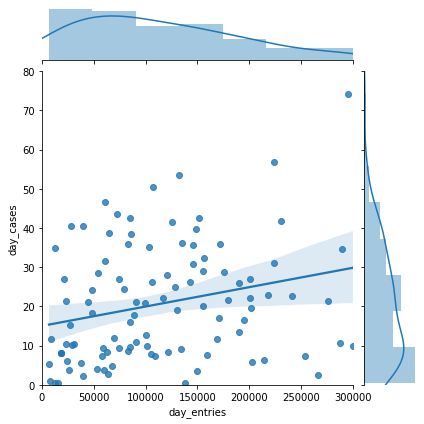

In [424]:
sns.jointplot('day_entries','day_cases', kind='regplot', xlim=(0,300000), ylim=(0,80), data=top_entries[top_entries.day_entries < 300000])

In [416]:
df_master[df_master.zipcode == '11207']

,zipcode,day_entries,day_cases
0,11207,605938.0,36.590909
